Load in the required libraries.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Load in the tracker data file. Remember to open the csv file and delete the first 3 rows as well as the last row.

In [4]:
read_in_array1 = np.loadtxt('/content/gdrive/MyDrive/2021-2022/22Winter/4AL/Python References/2.3 Momentum Tracker/08 mass1.csv',delimiter=',')
read_in_array2 = np.loadtxt('/content/gdrive/MyDrive/2021-2022/22Winter/4AL/Python References/2.3 Momentum Tracker/08 mass2.csv',delimiter=',')


Extract the time and velocities of the two objects.

In [5]:
time = read_in_array1[:,0]

velocity_m1 = read_in_array1[:,1]

velocity_m2 = read_in_array2[:,1]


Plot the velocities of the two masses $m_1$ and $m_2$ vs time to look at the velocity profile across time.

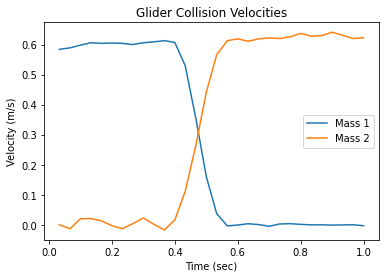

In [6]:
# Plot the velocity of m1 vs time
plt.plot(time,velocity_m1,label='Mass 1')
# Plot the velocity of m2 vs time
plt.plot(time,velocity_m2,label='Mass 2')
# Use axes labels and legends
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (m/s)')
plt.title('Glider Collision Velocities')
plt.legend()

Now we can plot the velocities of the two masses $m_1$ and $m_2$ vs the array index to find the pre-collision and post-collision points of interest for both the masses.

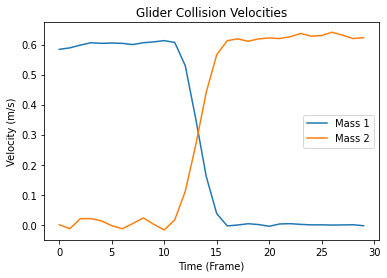

In [7]:
# Plot the velocity of m1 vs array index
plt.plot(velocity_m1,label='Mass 1')

# Plot the velocity of m2 vs array index
plt.plot(velocity_m2,label='Mass 2')
# Use axes labels and legends
plt.xlabel('Time (Frame)')
plt.ylabel('Velocity (m/s)')
plt.title('Glider Collision Velocities')
plt.legend()

Create new arrays to save the 5-10 data points for 

i) velocity of $m_1$ pre-collision,

ii) velocity of $m_2$ pre-collision,

iii) velocity of $m_1$ post-collision, and 

iv) velocity of $m_2$ post-collision


In [8]:
# Create 4 variables and save 5-10 data points for

# i) velocity of m1 pre-collision,
u1array = velocity_m1[1:9]
# ii) velocity of m2 pre-collision,
u2array = velocity_m2[1:9]
# iii) velocity of m1 post-collision, and 
v1array = velocity_m1[18:26]
# iv) velocity of m2 post-collision
v2array = velocity_m2[18:26]

Find the means and standard deviations of these 4 new arrays. They provide you with $v$ and $\delta v$ respecively.

So we have 

i) velocity of $m_1$ pre-collision : mean $u_1$ std $\delta u_1$

ii) velocity of $m_2$ pre-collision : mean $u_2$ std $\delta u_2$

iii) velocity of $m_1$ post-collision : mean $v_1$ std $\delta v_1$

iv) velocity of $m_2$ post-collision : mean $v_2$ std $\delta v_2$

(refer slide 5 of Lab 2C for variable naming context)

In [9]:
u1 = np.mean(u1array)

delta_u1 = np.std(u1array)

u2 = np.mean(u2array)

delta_u2 = np.std(u2array)

v1 = np.mean(v1array)

delta_v1 = np.std(v1array)

v2 = np.mean(v2array)

delta_v2 = np.std(v2array)

print(u1)
print(delta_u1)

print(u2)
print(delta_u2)

print(v1)
print(delta_v1)

print(v2)
print(delta_v2)


0.6014999999999999
0.005431390245600113
0.0063565
0.0139812412449682
0.0007297374999999998
0.0026136128390302476
0.624125
0.007406711483512781


Create variables for storing the mass of $m_1$ and $m_2$ as well as the associated $\delta m_1$ and $\delta m_2$

In [10]:
m1 = 0.209

m2 = 0.209

delta_m1 = 0.001

delta_m2 = 0.001


You have already built the functions to find momentum, error in momentum, energy and error in energy in the Pre-lab. Please copy the functions from the cell and paste them into cells in this notebook. 

In [11]:
# define momentum function
def momentum_function(m,v):
  p=m*v
  return p

In [12]:
# define momentum error function
def momentum_uncertainty(m,v,delta_m,delta_v):
  delta_p = momentum_function(m,v) * np.sqrt((delta_m/m)**2. + (delta_v/v)**2.)
  return delta_p

In [13]:
# define energy function
def kinetic_energy_function(m,v):
  k = 0.5*m*v**2.
  return k

In [14]:
# define energy error function
def kinetic_energy_uncertainty(m,v,delta_m,delta_v):
  delta_k = 0.5 * kinetic_energy_function(m,v) * np.sqrt((delta_m/m)**2. + (2*delta_v/v)**2.)
  return delta_k

Now, call the functions on the values that you have. Remember that the order of inputs into the function call must be in exactly the same order as the function definition. 

# Momentum and errors

In [15]:
# mass1 initial momentum with error
p1i = np.around(momentum_function(m1,u1),6)
delta_p1i = np.around(momentum_uncertainty(m1,u1,delta_m1,delta_u1),6)
print(p1i)
print(delta_p1i)

0.125713
0.001285


In [16]:
# mass2 initial momentum with error
p2i = np.around(momentum_function(m2,u2),6)
delta_p2i = np.around(momentum_uncertainty(m2,u2,delta_m2,delta_u2),6)
print(p2i)
print(delta_p2i)

0.001329
0.002922


In [17]:
# mass1 final momentum with error
p1f = np.around(momentum_function(m1,v1),6)
delta_p1f = np.around(momentum_uncertainty(m1,v1,delta_m1,delta_v1),6)
print(p1f)
print(delta_p1f)

0.000153
0.000546


In [18]:
# mass2 final momentum with error
p2f = np.around(momentum_function(m2,v2),6)
delta_p2f = np.around(momentum_uncertainty(m2,v2,delta_m2,delta_v2),6)
print(p2f)
print(delta_p2f)

0.130442
0.001669


System momentum loss :

If the initial momentum and error of $m_1$ are $p_{1i}$ and $\delta p_{1i}$, initial momentum with error of $m_2$ are $p_{2i}$ and $\delta p_{2i}$, final momentum and error of $m_1$ are $p_{1f}$ and $\delta p_{1f}$, final momentum with error of $m_2$ are $p_{2f}$ and $\delta p_{2f}$ then,

The system momentum loss is $(p_{1i} + p_{2i}) - (p_{1f} + p_{2f})$

The error in system momentum loss is $ \sqrt {({\delta p_{1i}})^2 + ({\delta p_{2i}})^2 + ({\delta p_{1f}})^2 +({\delta p_{2f}})^2} $

In [19]:
# System momentum loss
def mvloss(p1i,p2i,p1f,p2f):
  loss = p1i + p2i - p1f - p2f
  return loss

momentum_loss = mvloss(p1i,p2i,p1f,p2f)
print('The momentum loss is ' + str(np.around(momentum_loss,6)) + ' kg*m/s.')

# Error in system momentum loss
def mvlosserror(delta_p1i,delta_p2i,delta_p1f,delta_p2f):
  losserror = np.sqrt(delta_p1i**2. + delta_p2i**2. + delta_p1f**2. + delta_p2f**2.)
  return losserror

loss_error = mvlosserror(delta_p1i,delta_p2i,delta_p1f,delta_p2f)
print('The momentum loss error is +/-' + str(np.around(loss_error,6)) + ' kg*m/s.')

The momentum loss is -0.003553 kg*m/s.
The momentum loss error is +/-0.003643 kg*m/s.


# Energy and errors

Follow the procedure outlined in the momentum section and find the energies and associated errors.

In [20]:
def kinetic_energy_function(m,v):
# Indent starting here
# Calculate K
  k = 0.5*m*v**2.
# Return K
  return k


def kinetic_energy_uncertainty(m,v,delta_m,delta_v):
# Indent starting here
# Calculate delta_K
  delta_k = 0.5 * kinetic_energy_function(m,v) * np.sqrt((delta_m/m)**2. + (2*delta_v/v)**2.)


# Return delta_K
  return delta_k

In [23]:
energy1i = kinetic_energy_function(m1,u1)
energy2i = kinetic_energy_function(m2,u2)
energy1f = kinetic_energy_function(m1,v1)
energy2f = kinetic_energy_function(m2,v2)
energyerror1i = kinetic_energy_uncertainty(m1,u1,delta_m1,delta_u1)
energyerror2i = kinetic_energy_uncertainty(m2,u2,delta_m2,delta_u2)
energyerror1f = kinetic_energy_uncertainty(m1,v1,delta_m1,delta_v1)
energyerror2f = kinetic_energy_uncertainty(m2,v2,delta_m2,delta_v2)

Find the system energy loss and its associated error.

In [34]:
# System energy loss
def energyloss(e1i,e2i,e1f,e2f):
  loss = e1i + e2i - e1f - e2f
  return loss

print('The energy loss is ' + str(np.around(energyloss(energy1i,energy2i,energy1f,energy2f),6)) + ' Joules.')

# Error in system energy loss
def energylosserror(delta_e1i,delta_e2i,delta_e1f,delta_e2f):
  losserror = np.sqrt(delta_e1i**2. + delta_e2i**2. + delta_e1f**2. + delta_e2f**2.)
  return losserror

print('The error in energy loss is +/-' + str(np.around(energylosserror(energyerror1i,energyerror2i,energyerror1f,energyerror2f),6)) + ' Joules.')

The energy loss is -0.002894 Joules.
The error in energy loss is +/-0.000606 Joules.


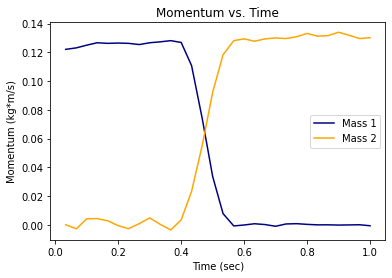

In [33]:
plt.plot(time,momentum_function(m1,velocity_m1),label='Mass 1',color='navy')
plt.plot(time,momentum_function(m2,velocity_m2),label='Mass 2',color='orange')
plt.xlabel('Time (sec)')
plt.ylabel('Momentum (kg*m/s)')
plt.title('Momentum vs. Time')
plt.legend()

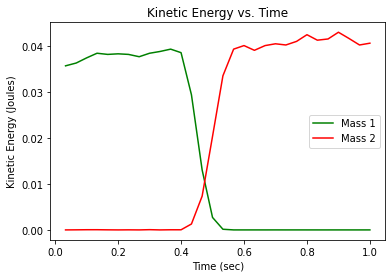

In [36]:
plt.plot(time,kinetic_energy_function(m1,velocity_m1),label='Mass 1',color='green')
plt.plot(time,kinetic_energy_function(m2,velocity_m2),label='Mass 2',color='red')
plt.xlabel('Time (sec)')
plt.ylabel('Kinetic Energy (Joules)')
plt.title('Kinetic Energy vs. Time')
plt.legend()